<a href="https://colab.research.google.com/github/Shakib-IO/INSE_6220_Lab_Winter_2023/blob/main/Pycaret_Issue_Resolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.3 MB/s eta 0:00:00
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyod-1.0.9.tar.gz (149 kB)
  Preparing metadata (s

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shreya201/INSE6220_40208796/main/Breast_cancer_data.csv')
df.head(5)

,MR,MT,MP,MA,MS,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


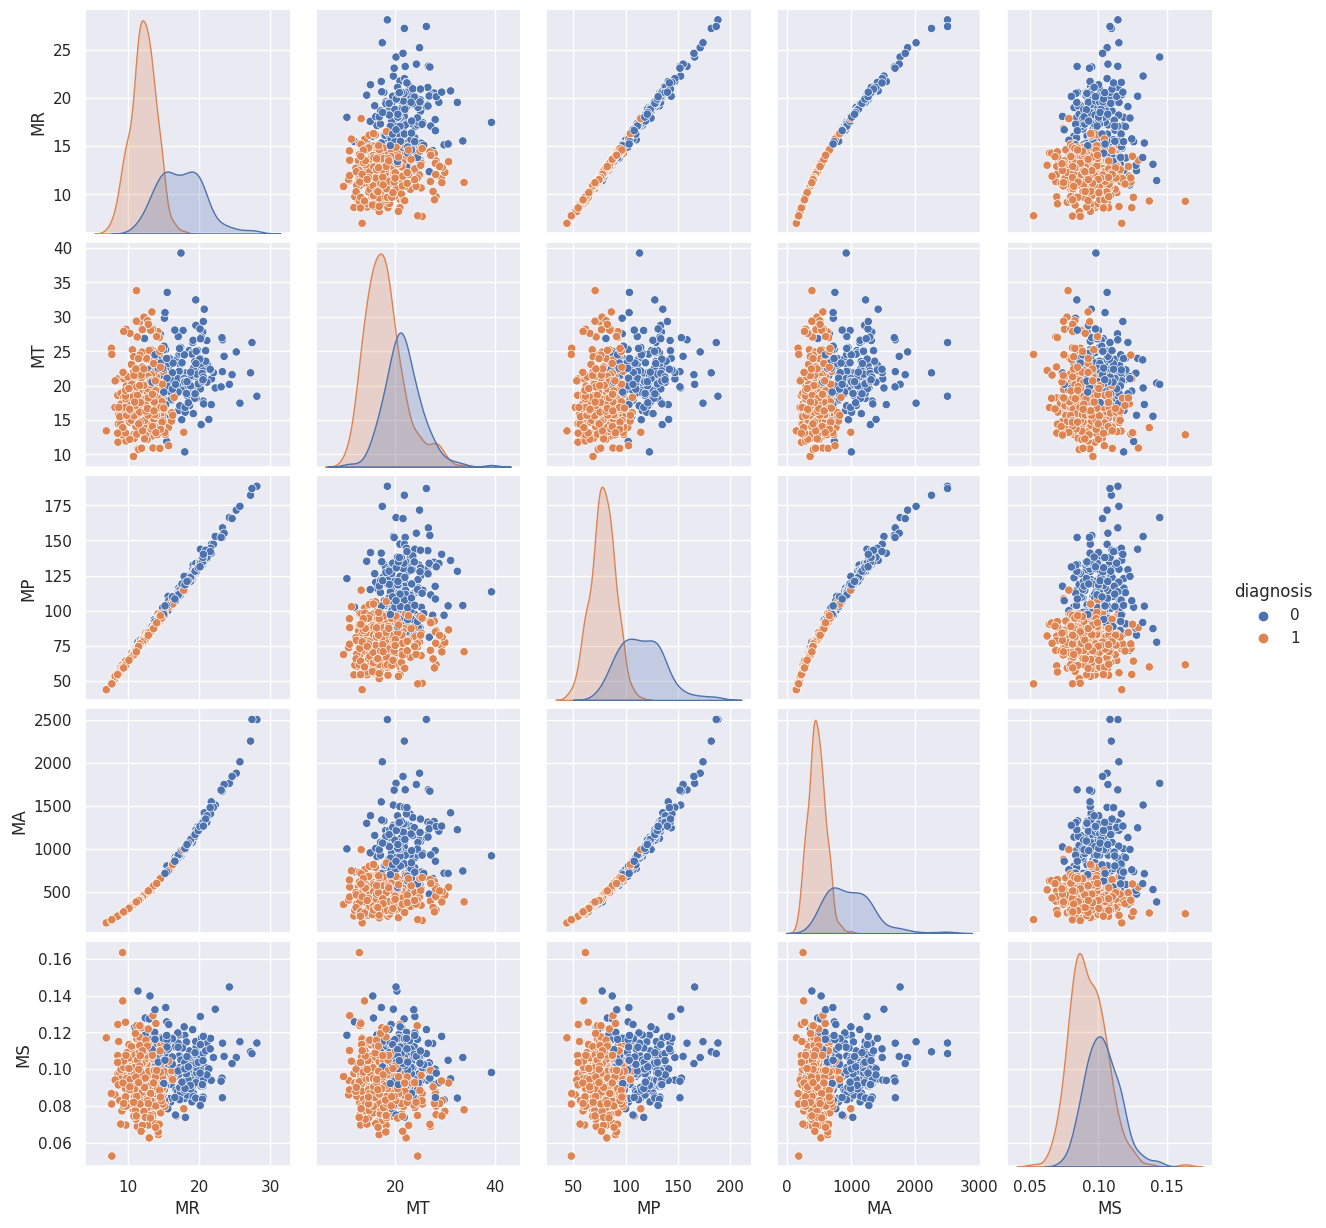

In [ ]:
sns.pairplot(df, hue='diagnosis')
plt.show()

In [ ]:
X = df.drop(columns=['diagnosis'])
X.head(10)

,MR,MT,MP,MA,MS
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
5,12.45,15.70,82.57,477.1,0.12780
6,18.25,19.98,119.60,1040.0,0.09463
7,13.71,20.83,90.20,577.9,0.11890
8,13.00,21.82,87.50,519.8,0.12730
9,12.46,24.04,83.97,475.9,0.11860


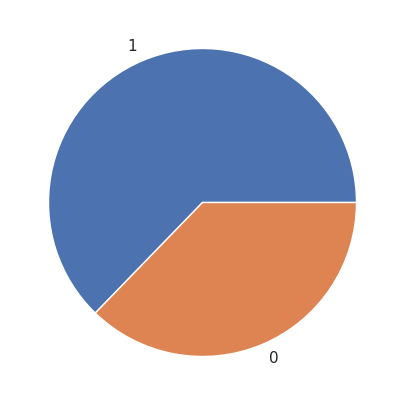

In [ ]:
y =df['diagnosis']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MR,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
MT,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
MP,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
MA,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
MS,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,MR,MT,MP,MA,MS
0,1.097064,-2.073335,1.269934,0.984375,1.568466
1,1.829821,-0.353632,1.685955,1.908708,-0.826962
2,1.579888,0.456187,1.566503,1.558884,0.942210
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553
4,1.750297,-1.151816,1.776573,1.826229,0.280372
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421
6,1.170908,0.160649,1.138125,1.095295,-0.123136
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699


In [ ]:
observations = list(df.index)
variables = list(df.columns)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


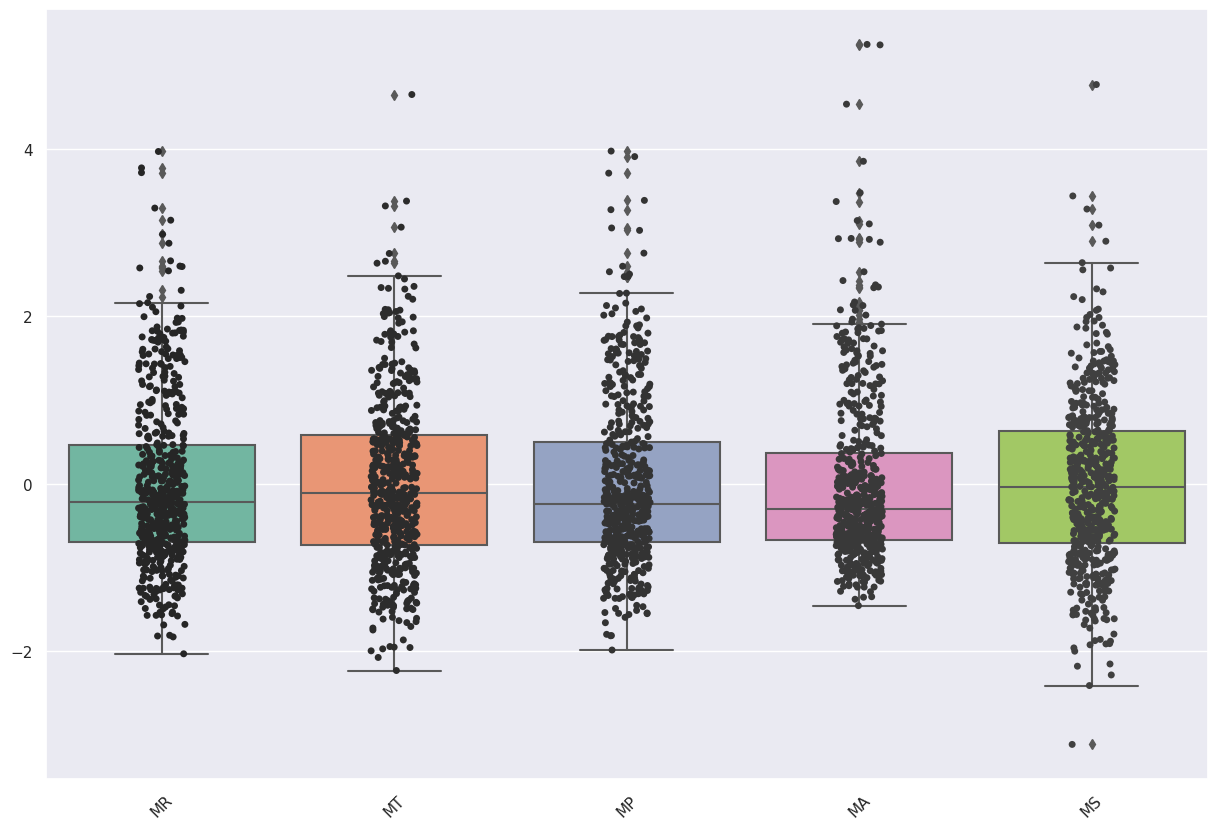

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
     

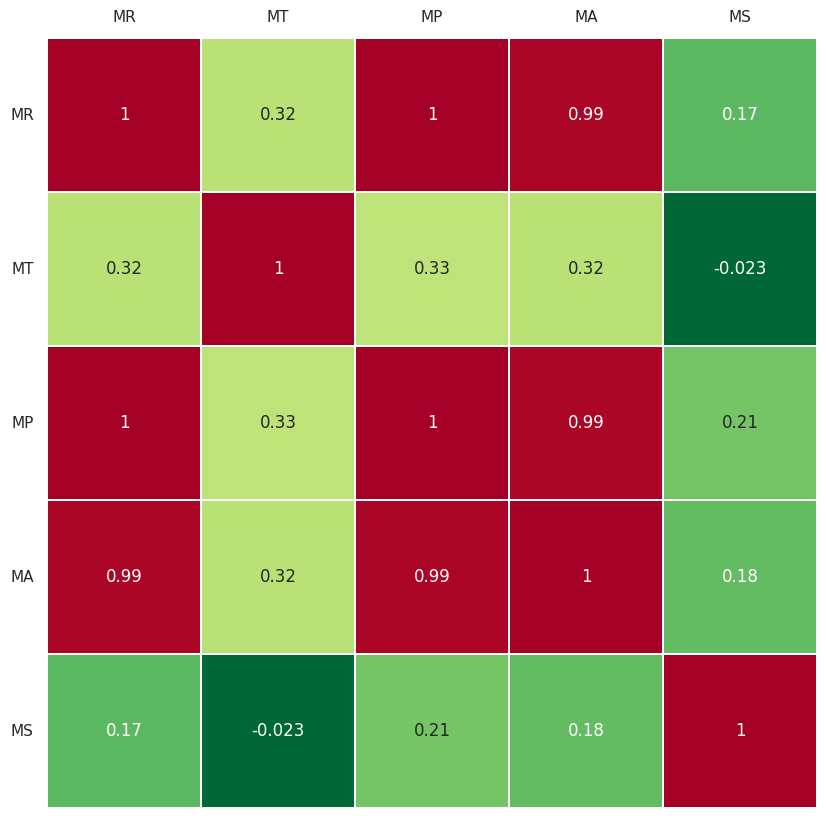

In [ ]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, 'Z2')

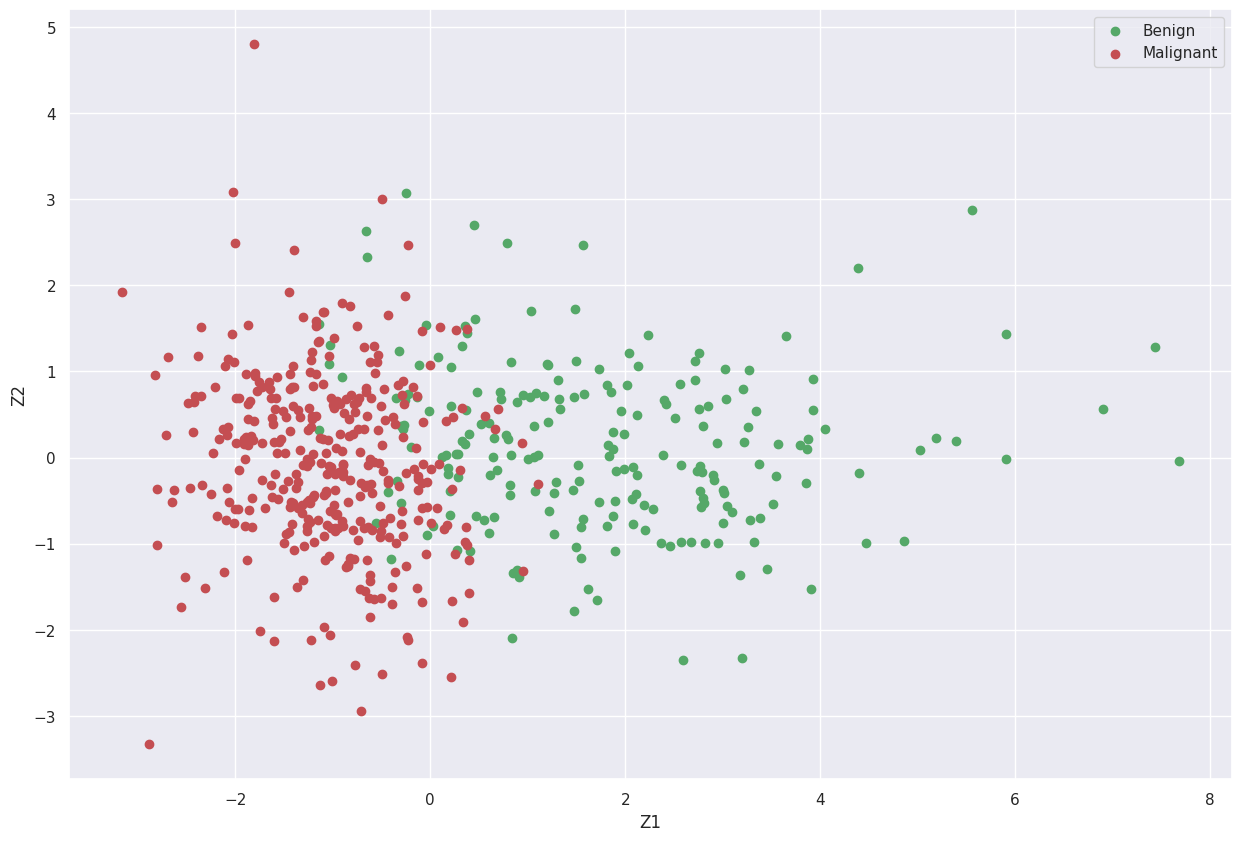

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

array([[ 0.55371341, -0.0026939 , -0.17451457, -0.3987202 , -0.70990216],
       [ 0.24687793, -0.53356361,  0.80887797,  0.00514554, -0.00714976],
       [ 0.55562001,  0.02473754, -0.14438462, -0.41807654,  0.70359047],
       [ 0.55179039,  0.00385895, -0.17093468,  0.81614814,  0.01400078],
       [ 0.1388039 ,  0.84538499,  0.51497137,  0.01048524, -0.02742701]])

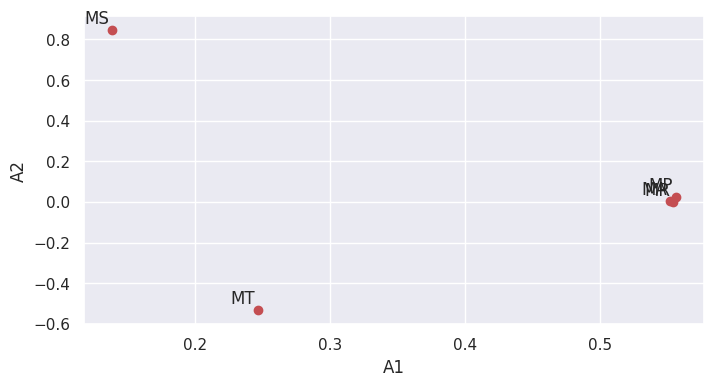

In [ ]:

A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

array([3.17792638e+00, 1.02288918e+00, 7.89967999e-01, 1.66216545e-02,
       1.39760342e-03])

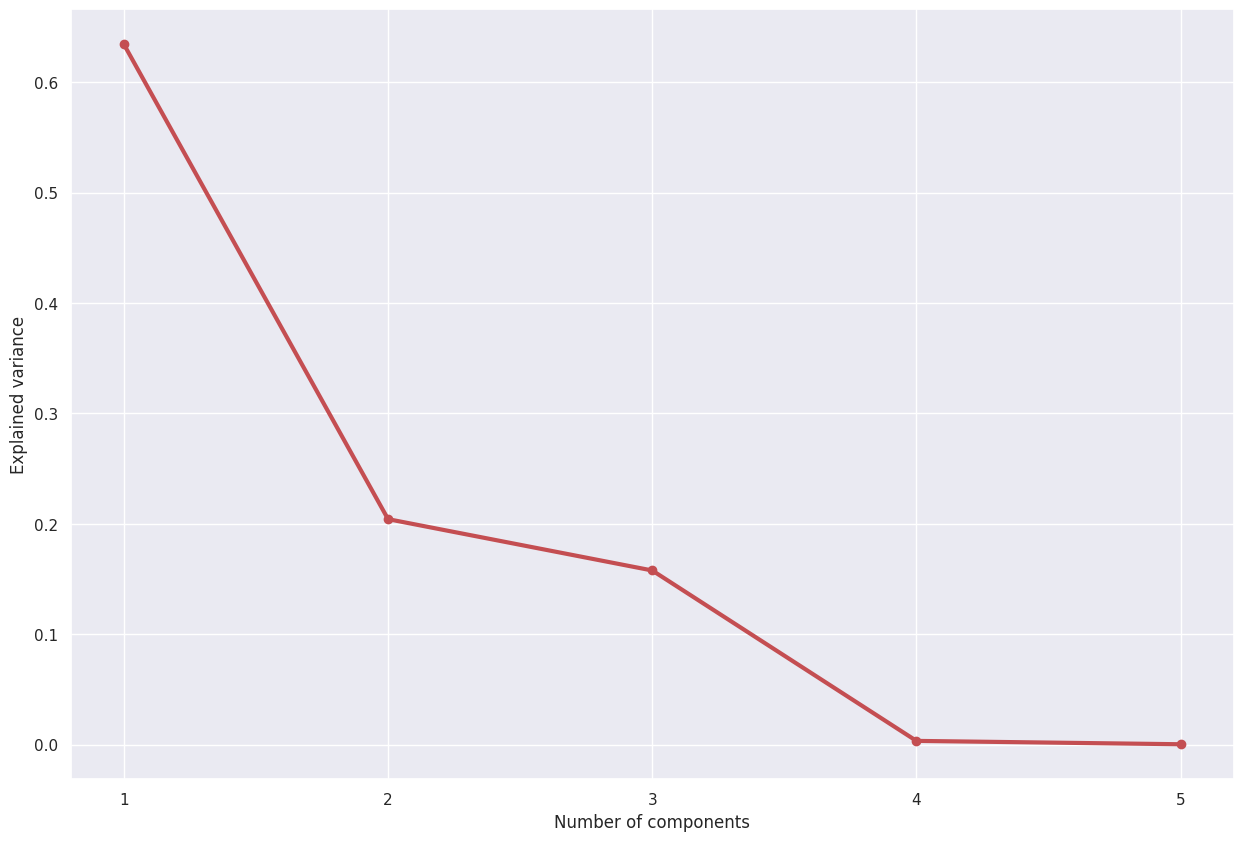

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

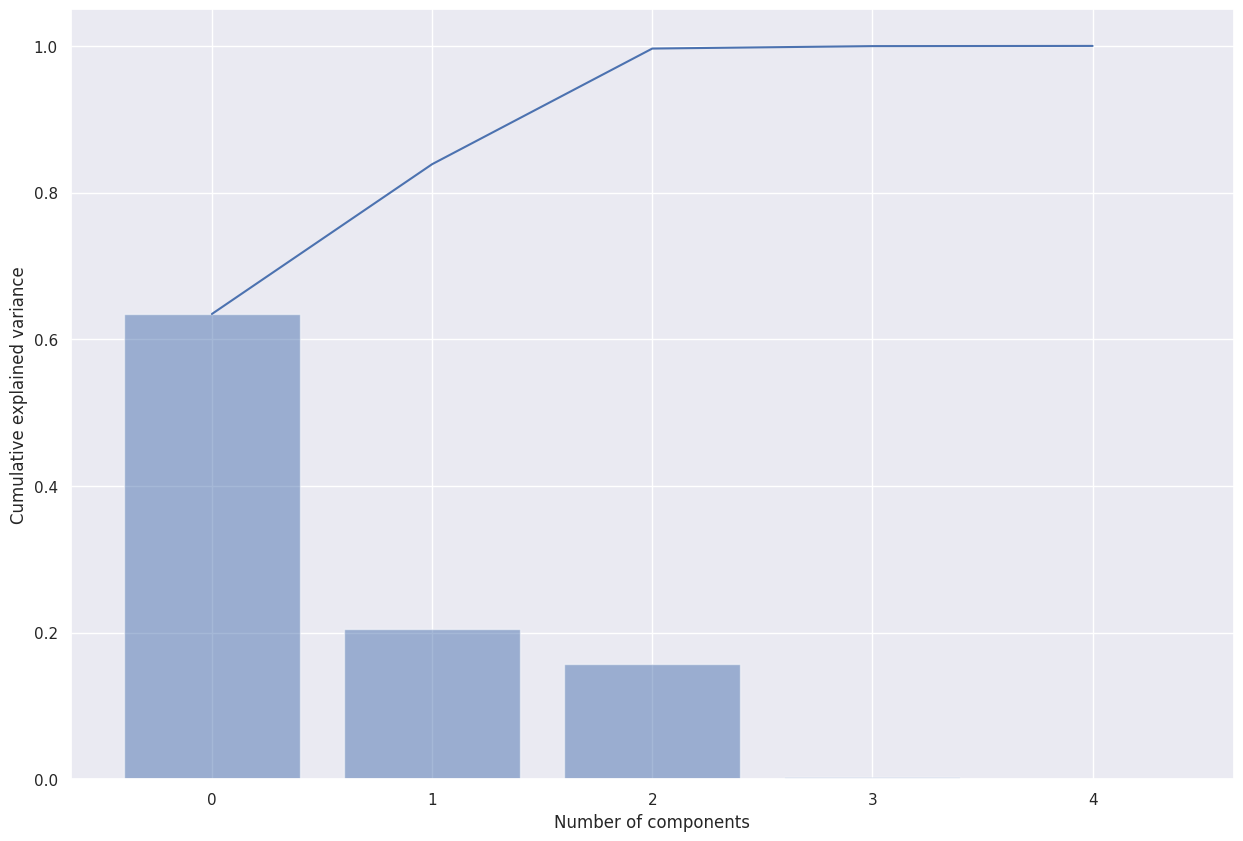

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
out['PC']

,PC1,PC2,PC3
0,1.562077,2.464472,-1.412436
1,2.801064,-0.466274,-1.600928
2,2.848768,0.593637,0.085851
3,-0.658477,2.624944,2.246609
4,2.718517,0.897870,-1.661423
...,...,...,...
564,3.929944,0.550143,0.053511
565,3.322039,-0.983901,0.913880
566,1.469870,-1.784997,0.903319
567,3.865523,0.093999,1.771963


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.97%] of the variance'}, xlabel='PC1 (63.4% expl.var)', ylabel='PC2 (20.4% expl.var)'>)

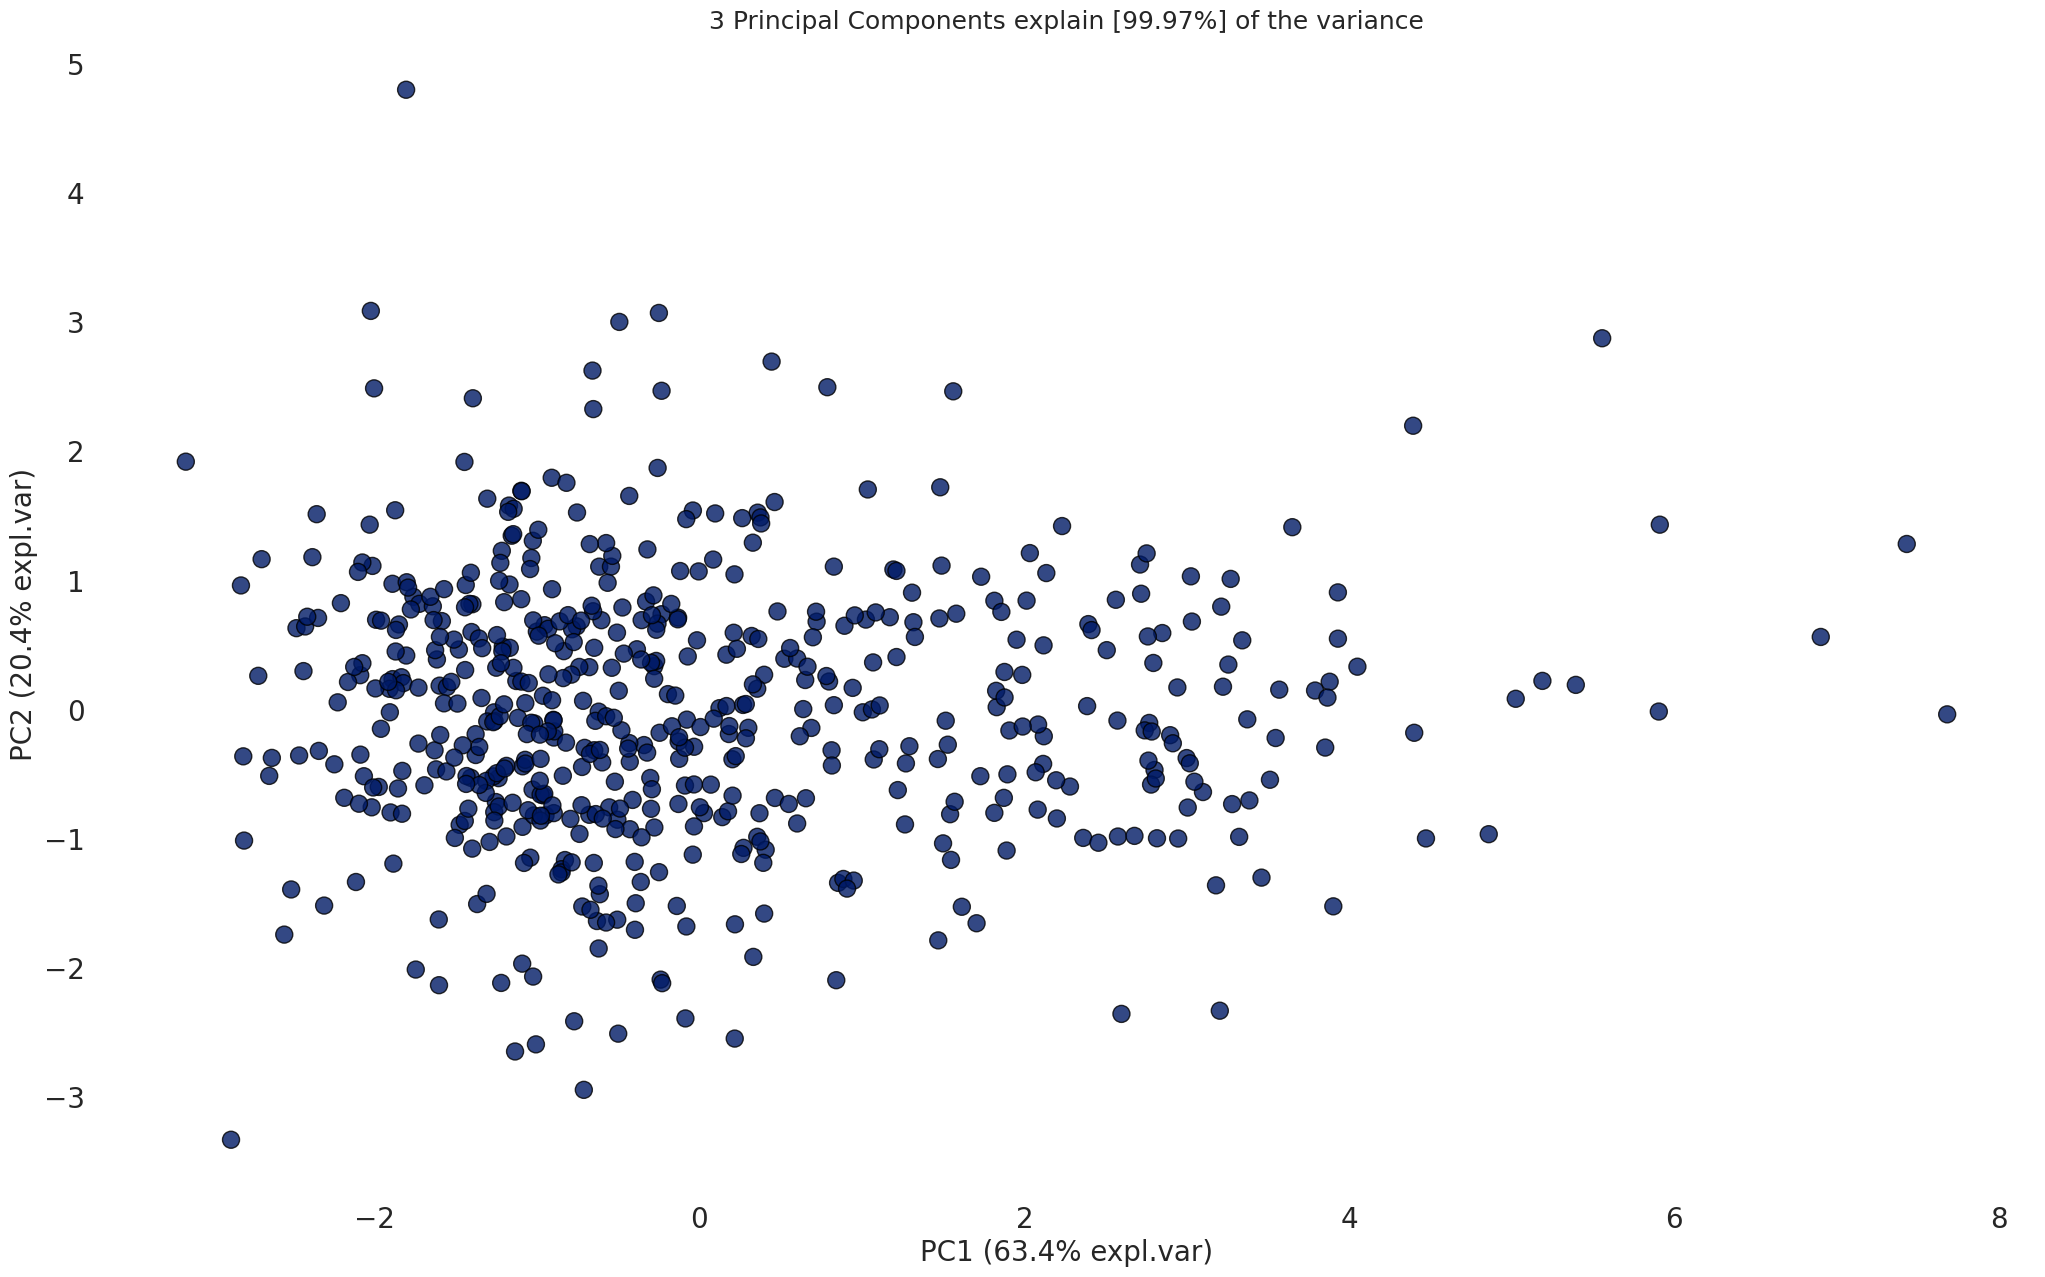

In [ ]:
model.scatter(label=True, legend=False)

In [ ]:
A = out['loadings'].T
A

,PC1,PC2,PC3
MR,0.553713,-0.002694,-0.174515
MT,0.246878,-0.533564,0.808878
MP,0.555620,0.024738,-0.144385
MA,0.551790,0.003859,-0.170935
MS,0.138804,0.845385,0.514971


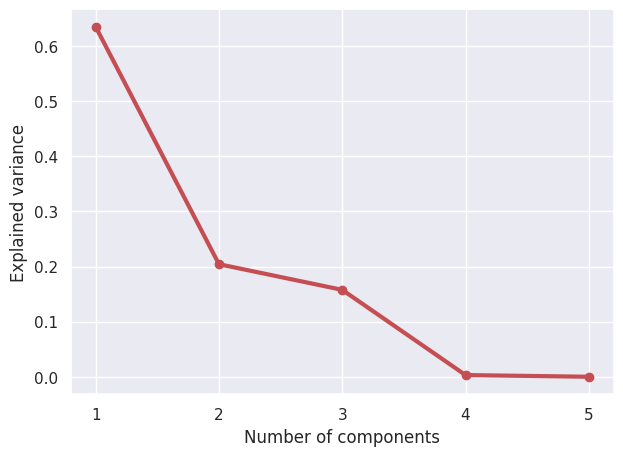

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

In [ ]:
from pycaret.utils import version
version()

'3.0.0'

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (512, 6)
Unseen Data For Predictions: (57, 6)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='diagnosis', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Original data shape,"(512, 6)"
4,Transformed data shape,"(512, 6)"
5,Transformed train set shape,"(358, 6)"
6,Transformed test set shape,"(154, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9302,0.9801,0.9727,0.9218,0.9455,0.8488,0.8549,0.0570
rf,Random Forest Classifier,0.9275,0.9654,0.9500,0.9358,0.9417,0.8453,0.8492,0.4110
xgboost,Extreme Gradient Boosting,0.9246,0.9659,0.9457,0.9345,0.9390,0.8398,0.8432,0.0990
ada,Ada Boost Classifier,0.9190,0.9674,0.9457,0.9288,0.9356,0.8264,0.8315,0.3480
gbc,Gradient Boosting Classifier,0.9190,0.9716,0.9502,0.9248,0.9361,0.8254,0.8299,0.4780
et,Extra Trees Classifier,0.9190,0.9682,0.9545,0.9200,0.9360,0.8254,0.8299,0.3850
lightgbm,Light Gradient Boosting Machine,0.9107,0.9665,0.9322,0.9262,0.9284,0.8095,0.8118,0.3090
lr,Logistic Regression,0.9079,0.9726,0.9411,0.9152,0.9266,0.8025,0.8082,0.8750
nb,Naive Bayes,0.9076,0.9661,0.9727,0.8932,0.9294,0.7962,0.8098,0.0490
qda,Quadratic Discriminant Analysis,0.9076,0.9796,0.9591,0.9000,0.9276,0.7999,0.8068,0.0530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]